# Deepfake recognition project

# Preprocessing phase: cropping faces in videos

Video dataset (Centrale Supelec deepfake recognition hackathon 2024 (available on Kaggle))

In [54]:
import os
#Change directory if needed
root='/Users/Riyad/Documents/Perso_projects/Face_recognition/training_dataset'
video_files = [f for f in os.listdir(root) if f.endswith('.mp4')]
video_files

['skzrewvamy.mp4',
 'sdetnpbgki.mp4',
 'bkppzqmzdp.mp4',
 'oksteyiysx.mp4',
 'gmormxdytr.mp4',
 'hfdlriqcir.mp4',
 'mrhjcqgyse.mp4',
 'hiafeqjgjt.mp4',
 'kdtbxvoslf.mp4',
 'fkcvweykwa.mp4',
 'wopywyidjy.mp4',
 'zygttkqdgu.mp4',
 'ozgsdfnksv.mp4',
 'znpdbbsfvj.mp4',
 'fwerqbukmq.mp4',
 'iclluvbprk.mp4',
 'essiclzurj.mp4',
 'pupjadwkax.mp4',
 'actccqfmac.mp4',
 'jddhnvfeeh.mp4',
 'umfofgurar.mp4',
 'vdaeabtran.mp4',
 'vuyaffkrtu.mp4',
 'wwszykqgqk.mp4',
 'hipksamgsi.mp4',
 'cjsopoykvh.mp4',
 'balgkhiurl.mp4',
 'fvudxsypdc.mp4',
 'exiabvuzmo.mp4',
 'xfabmcoyvf.mp4',
 'yjlqmmufse.mp4',
 'rneucagbvg.mp4',
 'wgfmaikyin.mp4',
 'unqcbybnqp.mp4',
 'ianegceftx.mp4',
 'tqynacztnp.mp4',
 'bgymmjkbec.mp4',
 'iddcjxsgyq.mp4',
 'zcxyedqnnl.mp4',
 'smwezpkhsn.mp4',
 'sdxjjqeomi.mp4',
 'ldmfupwexi.mp4',
 'sbdzaklgsi.mp4',
 'oaaoicrccb.mp4',
 'rstxllpnab.mp4',
 'sfzbjyskjx.mp4',
 'kanodwpdss.mp4',
 'uhdqecemtc.mp4',
 'uvatcqnhoz.mp4',
 'djxtvdtmxx.mp4',
 'gqeapnhtur.mp4',
 'irrvmjbowk.mp4',
 'vftargtdwb

Sample from video dataset

In [ ]:
import cv2
import numpy as np

  # Set the frame rate (try adjusting this value)
  
def read_video(path):
  cap=cv2.VideoCapture(path)
  cap.set(cv2.CAP_PROP_FPS, 30)
  while cap.isOpened():
      ret, frame = cap.read()
      # if frame is read correctly ret is True
      if not ret:
          print("Can't receive frame (stream end?). Exiting ...")
          break
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      cv2.imshow('frame',frame)
      if cv2.waitKey(60) == ord('q'):
          break
  cap.release()
  cv2.destroyAllWindows()
  
read_video(root+'/'+video_files[np.random.randint(0,len(video_files))])

Importing libraries

In [ ]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import cv2
from PIL import Image, ImageDraw
from IPython import display 
import os
import tqdm

Running on GPU (mps for macos but set to cuda if necessary)

In [32]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: mps


Initialising MTCNN for face cropping, (can't use mps but if you have cuda set device to cuda)

In [85]:
mtcnn = MTCNN(keep_all=True, device='cpu')

Cropped_videos output

In [78]:
!mkdir cropped_videos

Face cropping

In [87]:
out_path = '/Users/Riyad/Documents/Perso_projects/Face_recognition/cropped_videos'
for nb,video_name in enumerate(video_files) :
    try:
        frames1 = []
        video = cv2.VideoCapture(root+'/'+video_name)
        #Getting video frames
        while True:
            read, frame= video.read()
            if not read:
                break
            frames1.append(frame)

        
        #Detecting faces
        frames2 = np.array(frames1)
        frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in frames2]

        
        frames_tracked = []
        boxes_frame =[]
        for i, frame in enumerate(frames):
            frame = frame.resize((224, 224))  # Resize to a multiple of 112
            boxes, _ = mtcnn.detect(frame)
            
            boxes_frame.append(boxes.tolist())
            frame_draw = frame.copy()
            box = boxes[0]
            top,left,bot,right = box

            frames_tracked.append((frame_draw.crop(box.tolist()).resize((112, 112), Image.BILINEAR)))

        print('\nDone'+str(nb))


        #Putting cropped_video in cropped_videos directory
        out = cv2.VideoWriter(out_path+'/'+video_name[:-4]+'_cropped'+'.mp4',cv2.VideoWriter_fourcc('m','p','4','v'), 30, (112,112))

        
        numpy_image = np.array(frames_tracked[0])
        opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
        out.write(opencv_image)
        released = False
        i = 1
        while True:
            numpy_image = np.array(frames_tracked[i % len(frames_tracked)])
            opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
            if not released :
                out.write(opencv_image)
            i += 1
            if not released and (i%len(frames_tracked)==0 or i%len(frames_tracked) == 1) :
                out.release()
                print("released")
                released = True
                break
    except KeyboardInterrupt:
        break
    except:
        #Usually happens when boxes is empty
        print(video_name + " échec passage à la suivante")
        pass


    


Done0
released
sdetnpbgki.mp4 échec passage à la suivante

Done2
released

Done3
released
gmormxdytr.mp4 échec passage à la suivante
hfdlriqcir.mp4 échec passage à la suivante

Done6
released

Done7
released
kdtbxvoslf.mp4 échec passage à la suivante
fkcvweykwa.mp4 échec passage à la suivante

Done10
released

Done11
released

Done12
released
znpdbbsfvj.mp4 échec passage à la suivante
fwerqbukmq.mp4 échec passage à la suivante

Done15
released

Done16
released

Done17
released

Done18
released
jddhnvfeeh.mp4 échec passage à la suivante
umfofgurar.mp4 échec passage à la suivante

Done21
released

Done22
released
wwszykqgqk.mp4 échec passage à la suivante
hipksamgsi.mp4 échec passage à la suivante

Done25
released
balgkhiurl.mp4 échec passage à la suivante
fvudxsypdc.mp4 échec passage à la suivante
exiabvuzmo.mp4 échec passage à la suivante
xfabmcoyvf.mp4 échec passage à la suivante
yjlqmmufse.mp4 échec passage à la suivante
rneucagbvg.mp4 échec passage à la suivante

Done32
released

D

The labelling file doesn't have the '_cropped' at the end of the file names so we remove this extension

In [ ]:
import os
def rename_files_in_folder(folder_path):
   """
   Rename all files in a folder, removing "_cropped" if it exists.


   Parameters:
       folder_path (str): The path to the folder containing the files.
      
   Returns:
       bool: True if all files were successfully renamed, False otherwise.
   """
   try:
       # Iterate over all files in the folder
       for filename in os.listdir(folder_path):
           old_name = os.path.join(folder_path, filename)
           if os.path.isfile(old_name):
               new_name = os.path.join(folder_path, filename.replace("_cropped", ""))
               os.rename(old_name, new_name)
       return True
   except Exception as e:
       print(f"An error occurred: {e}")
       return False




rename_files_in_folder("/Users/Riyad/Documents/Perso_projects/Face_recognition/cropped_videos")

In [ ]:
cropped_dir='/Users/Riyad/Documents/Perso_projects/Face_recognition/cropped_videos'
cropped_videos=os.listdir(cropped_dir)
cropped_videos=[f for f in cropped_videos if f.endswith('mp4')]
cropped_videos

Displaying cropped_video

In [207]:
import cv2
import numpy as np

directory='/Users/Riyad/Documents/Perso_projects/Face_recognition/cropped_videos/'
directory+=np.random.choice(cropped_videos)
read_video(directory)






2024-10-01 13:45:54.476 Python[25746:25566391] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_deadKeyStateWithReply:) block performed very slowly (9.74 secs).
2024-10-01 13:45:54.476 Python[25746:25566391] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_deadKeyStateWithReply:) block performed very slowly (8.49 secs).
2024-10-01 13:45:54.476 Python[25746:25566391] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_deadKeyStateWithReply:) block performed very slowly (6.83 secs).
2024-10-01 13:45:54.476 Python[25746:25566391] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_deadKeyStateWithReply:) block performed very slowly (5.58 secs).
2024-10-01 1

Can't receive frame (stream end?). Exiting ...


# Model

Importing more libraries

In [8]:



import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset


Extracting labels from json label file

In [208]:


import json
import pandas as pd 
with open("/Users/Riyad/Documents/Perso_projects/Face_recognition/training_dataset/metadata.json",'r') as file:
    data=json.load(file)

data_list=[{"file":k,"label":v} for k,v in data.items() if k in cropped_videos]
labels=pd.DataFrame(data_list)
labels.head()

,file,label
0,skzrewvamy.mp4,real
1,bkppzqmzdp.mp4,real
2,oksteyiysx.mp4,fake
3,mrhjcqgyse.mp4,fake
4,hiafeqjgjt.mp4,fake


Creating video dataset class to be able to use resnext

In [143]:
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
      
    # Extracting frames from videos, converting them to neural network input (tensor) and corresponding label (needed for Loader class)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        video_path='/Users/Riyad/Documents/Perso_projects/Face_recognition/cropped_videos'+'/'+video_path
        frames = []
        temp_video = video_path.split('/')[-1]
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'fake'):
          label = 0
        if(label == 'real'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        if len(frames) == 0:
            raise RuntimeError(f"No frames captured for video: {video_path}")
        frames = torch.stack(frames)

        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
      
    #used in __getitem__
    def frame_extract(self,path): 
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image

Conversion of videos to torch tensors and DataLoader definition

In [185]:
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

video_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

cropped_videos_transformed = video_dataset(cropped_videos,labels,sequence_length = 10,transform = video_transforms)

video_loader = DataLoader(cropped_videos_transformed,batch_size = 1,shuffle = True,num_workers = 0)





Neural net definition

In [ ]:
from torch import nn
from torchvision.models.video import r3d_18

model=r3d_18(pretrained=True)

num_classes=2
model.fc=nn.Linear(model.fc.in_features,num_classes)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4)




Change to MSE if needed

In [219]:
criterion=nn.CrossEntropyLoss()

# Training loop (looping over the dataset num_episodes times)

Note: Dataset is relatively small so overfitting is an issue

In [220]:
import matplotlib.pyplot as plt
i=0
loss_tab=[]
label_tab=[]
num_episodes=10
for e in range(num_episodes):
    for inputs,label in video_loader:
        inputs = inputs.permute(0, 2, 1, 3, 4)
        #resetting gradients
        optimizer.zero_grad()
        #Model outputs
        outputs=model(inputs)
        #One hot encoding the label
        labels_transform=[]
        for i in range(len(label.data)): 
            x=label.data[i]
            label_tab.append(x)
            labels_transform.append([1 if i==x else 0 for i in range(2)])
        labels_transform=torch.Tensor(labels_transform)
        # Tuning (backprop/gradient descent) the network
        loss=criterion(outputs,labels_transform)
        loss_tab.append(loss.item())
        print(loss)
        loss.backward()
        optimizer.step()
plt.plot(loss_tab)
plt.plot(label_tab)

tensor(1.6416, grad_fn=<DivBackward1>)
tensor(1.6367, grad_fn=<DivBackward1>)
tensor(1.5399, grad_fn=<DivBackward1>)
tensor(1.4225, grad_fn=<DivBackward1>)
tensor(1.4071, grad_fn=<DivBackward1>)
tensor(1.3003, grad_fn=<DivBackward1>)
tensor(0.3322, grad_fn=<DivBackward1>)
tensor(1.2374, grad_fn=<DivBackward1>)
tensor(0.3796, grad_fn=<DivBackward1>)
tensor(1.1265, grad_fn=<DivBackward1>)
tensor(1.0912, grad_fn=<DivBackward1>)
tensor(1.0416, grad_fn=<DivBackward1>)
tensor(0.4833, grad_fn=<DivBackward1>)
tensor(0.9696, grad_fn=<DivBackward1>)
tensor(0.9466, grad_fn=<DivBackward1>)
tensor(0.9072, grad_fn=<DivBackward1>)
tensor(0.8767, grad_fn=<DivBackward1>)
tensor(0.8123, grad_fn=<DivBackward1>)
tensor(0.8038, grad_fn=<DivBackward1>)
tensor(0.6528, grad_fn=<DivBackward1>)
tensor(0.6453, grad_fn=<DivBackward1>)
tensor(0.6863, grad_fn=<DivBackward1>)
tensor(0.6430, grad_fn=<DivBackward1>)
tensor(0.6239, grad_fn=<DivBackward1>)
tensor(0.6215, grad_fn=<DivBackward1>)
tensor(0.5953, grad_fn=<D

KeyboardInterrupt: 

Ended the training early as loss was getting really low

Text(0, 0.5, 'loss')

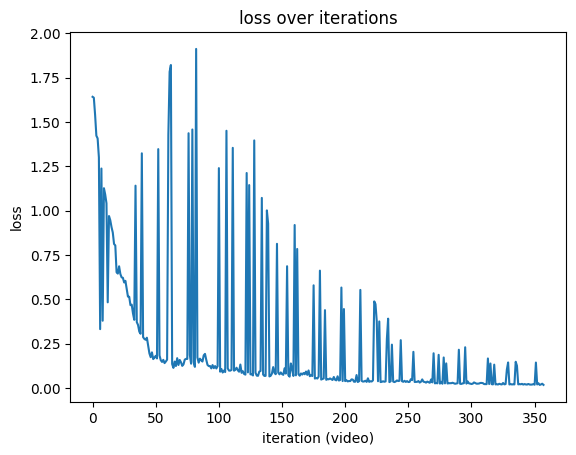

In [221]:
plt.plot(loss_tab)
plt.title('loss over iterations')
plt.xlabel('iteration (video)')
plt.ylabel('loss')

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred,y_true=[],[]
for inputs,label in video_loader:
    print(i)
    i+=1
    inputs = inputs.permute(0, 2, 1, 3, 4)
    outputs=model(inputs)
    pred=np.argmax(outputs.data)
    true=label.data
    y_pred.append(pred)
    y_true.append(true)
conf_matrix=confusion_matrix(y_true,y_pred)
conf_matrix_graph=ConfusionMatrixDisplay(conf_matrix)
    
    
    

Confusion matrix plot

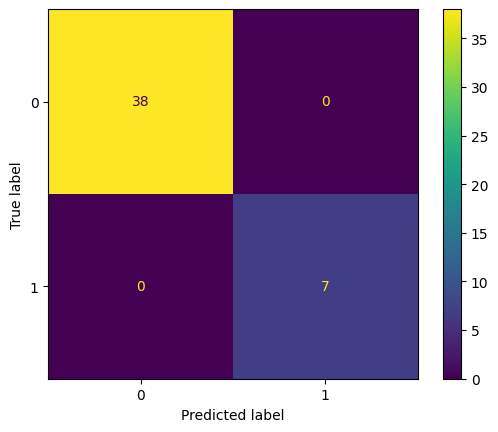

In [223]:
conf_matrix_graph=ConfusionMatrixDisplay(conf_matrix)
conf_matrix_graph.plot()

Saving model

In [224]:
torch.save(model.state_dict(),'model_weights.pth')